## 1. Importing packages

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split as split

## 2. Importing Data set

In [28]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dmXfQspTQtRr3svsN_Ax3V_0ZOa7koBhC7_sopq4PkRP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'perinatalhealthriskpredictorsusin-donotdelete-pr-nlrsgqawcsihqh'
object_key = 'Perinatal health risk predictors using artificial intelligence.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [29]:
dataset.shape

(1014, 7)

## 3. Variable Description and Identification

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


#### Here, we have Risk Level as target variable, and the rest of the variables are predictor variables.

### 3.1 Variable Data Types

#### Categorical Variable: Risk Level.

#### Numerical Variable: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.



### 3.2 Checking Null/Missing Values

In [31]:
dataset.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### No null values present in the data set

### 3.3 Checking Duplicates

In [32]:
print(f"There are {dataset.duplicated().sum()} duplicates data")
dataset.loc[dataset.duplicated(keep=False)].sort_values(by=dataset.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


#### There are 562 duplicate values in the data set which is very huge for this data, since data set has only 1014 data in it.

## 4. Analysis of individual features / Univariate analysis

### 4.1 Categorical Variables

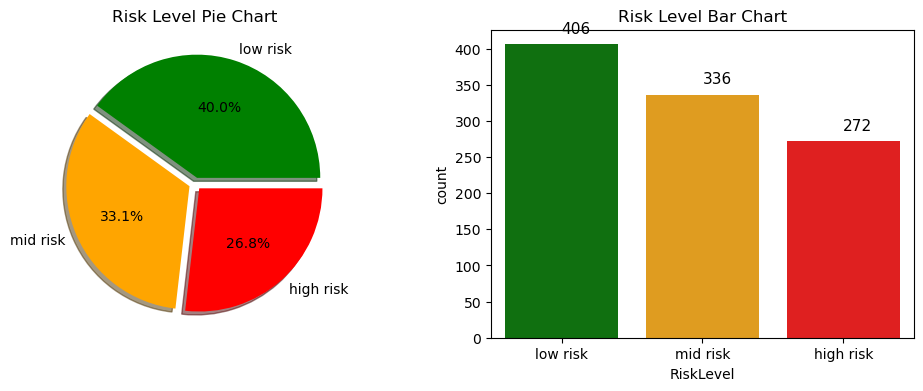

In [35]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

dataset["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=dataset, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), 
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

#### Most pregnant weomen in this dataset mostly has low health risk. 

#### Out of 1014 observations, 406 (40%) of pregnant women has low risk, 336 (33.1%) has med risk, and 272 (26.8%) has high risk.

### 4.2 Numerical Variables

In [52]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1014.0,NaN,NaN,NaN,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,NaN,NaN,NaN,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,NaN,NaN,NaN,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,NaN,NaN,NaN,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,NaN,NaN,NaN,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,NaN,NaN,NaN,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0
RiskLevel,1014,3,low risk,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From above observation it looks like there are outliers specially in Age,BS and HeartRate

### 4.2.1 Outlier detection using boxplot

In [72]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

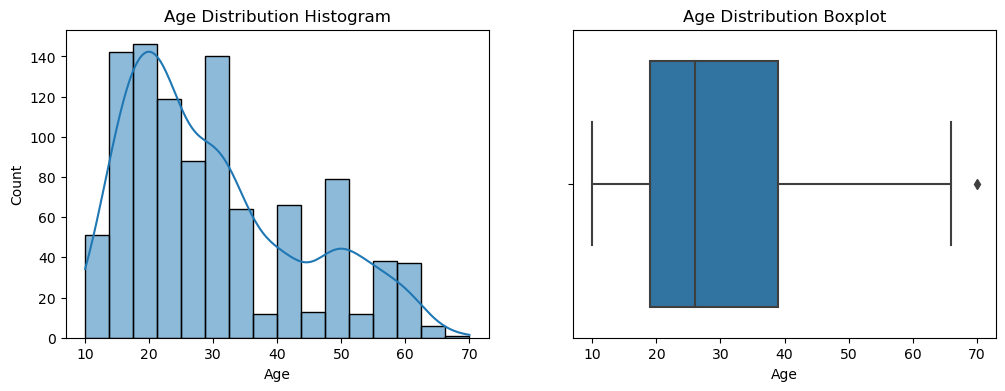

In [71]:
# Age
num_plot(dataset, "Age")

In [ ]:
# SystolicBP

num_plot(data, "SystolicBP")

In [ ]:
# DiastolicBP

num_plot(data, "DiastolicBP")

In [ ]:
# BS

num_plot(data, "BS")

In [ ]:
# BodyTemp

num_plot(data, "BodyTemp")

In [ ]:
# HeartRate

num_plot(data, "HeartRate")

#### From the above observation, most of the features have outliers in it.

#### Most of them seem to be natural/practically possible other than HeartRate 

## 5. Bivariate Analysis

### 5.1 Numerical Variables

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.pairplot(data)
plt.show()

#### DiastolicBP and SystolicBP are highly correlated

### 5.2 Predictor and Target

### 5.2.1 Age → RiskLevel

In [ ]:
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women aged below 24 years mostly has low health risk.
#### 2.Health risks will start to increase after that age (starting from the age of 25 years).
#### 3.Surprisingly, the health risk of pregnant women over 59 years old is decreased

### 5.2.2 SystolicBP → RiskLevel

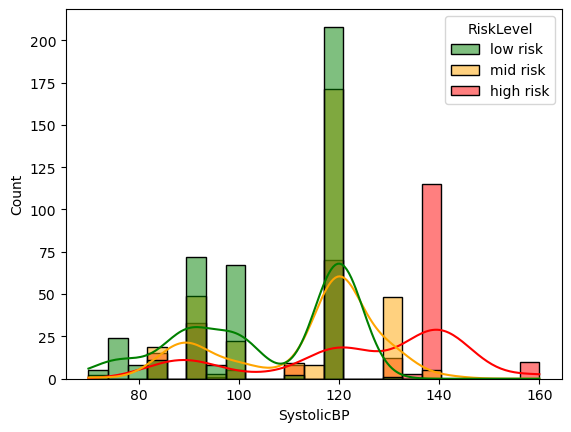

In [73]:
sns.histplot(data=dataset, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women with upper value of blood pressure >= 100 mmHg mostly has low health risk.
#### 2.The higher pregnant women's blood pressure, the higher the health risk

### 5.2.3 DiastolicBP → RiskLevel

In [ ]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.This variable has pretty similar pattern as SystolicBP. This is not surprising since they're highly correlated.

### 5.2.4 BS → RiskLevel

In [ ]:
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Almost every pregnant women with blood glucose level >= 8 has high health risk.
#### 2.But otherwise, they seems to have lower health risk with blood glucose < 8

### 5.2.5 BodyTemp → RiskLevel

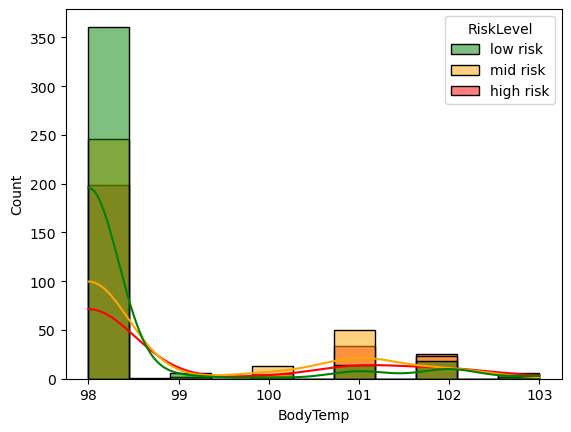

In [74]:
sns.histplot(data=dataset, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature
#### 2.Pregnant women with body temperature >= 100 mostly has higher health risk

### 5.2.6 HeartRate → RiskLevel

In [ ]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.As i mentioned before, HeartRate variable has outlier that with a value that looks unnatural, which is 6 bpm.
#### 2.Health risks seem to be getting higher along with the number of heart rate.

## 6.Multivariate analysis

### 6.1 Age and SystolicBP → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women with high SystolicBP seems to have a high health risk, regardless of their age.
#### 2.Having low SystolicBP at a young age (under 50 years) doesn't guarantee does not guarantee our health risk is low, but it seems to have it in old age makes our health risks lower.

### 6.2 Age and DiastolicBP → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.We can see the same pattern as before, since SystolicBP and DiastolicBP are highly correlated

### 6.3 Age and BS → RiskLevel

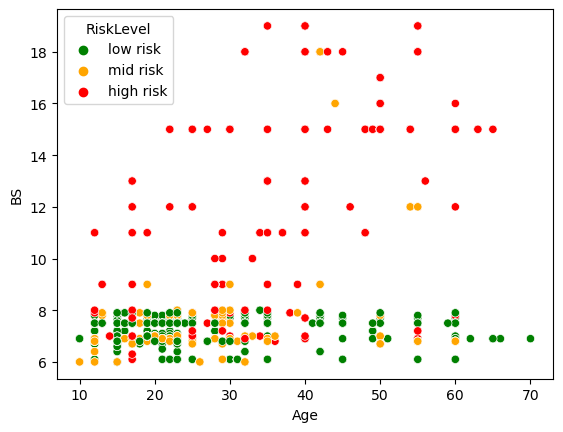

In [75]:
sns.scatterplot(data=dataset, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### Pregnant women with high blood glucose level seems to have a high health risk, regardless of their age.

### 6.4 Age and BodyTemp → RiskLevel

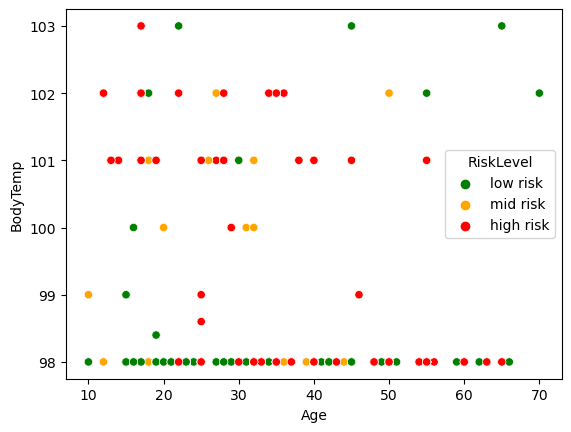

In [76]:
sns.scatterplot(data=dataset, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Younger women with normal body temperature mostly have low health risk, but they'll have higher risk if they have high body temperature.
#### 2.High body temperature for older women doesn't doesn't appear to significantly affect their health risks

### 6.5 Age and HeartRate → RiskLeve

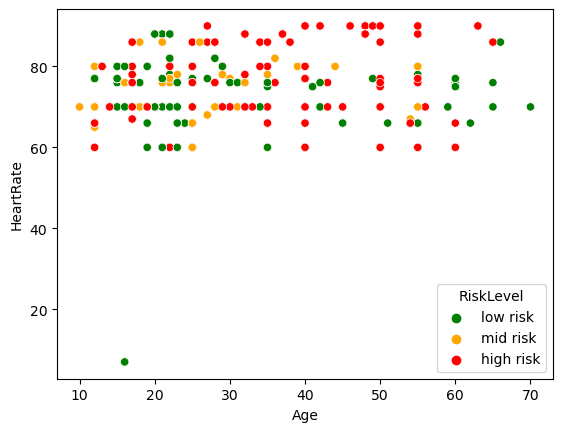

In [77]:
sns.scatterplot(data=dataset, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### It seems that heart rate has less effect on pregnant women's health risk compared to age

### 6.6 SystolicBP and DiastolicBP → RiskLeve

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Apparently, pregnant women with lower SystolicBP and DiastolicBP seems to have a lower health risk.
#### 2.But otherwise, the higher SystolicBP and DiastolicBP they have, the higher their health risk.

### 6.7 SystolicBP and BS → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.We can see almost similar pattern as before.
#### 2.However, a higher BS value seems to affect the health risks of pregnant women more.

### 6.8 SystolicBP and BodyTemp → RiskLevel

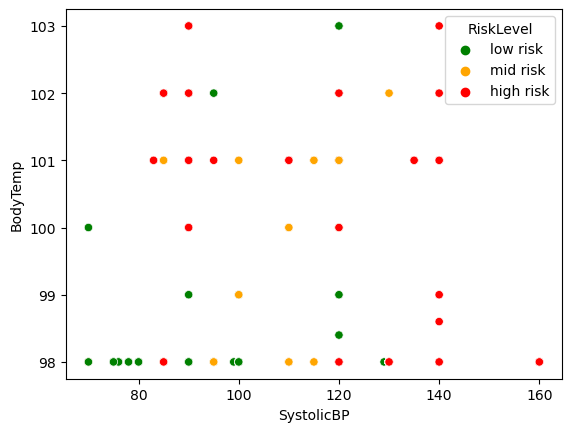

In [78]:
sns.scatterplot(data=dataset, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women with normal body temperature and low SystolicBP mostly has low health risk.
#### 2.But the one who has high SystolicBP seems to have higher health risk, regardless of their body temperature.

### 6.9 SystolicBP and HeartRate → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.HeartRate value seems has less effect on pregnant women's health risk compared to SystolicBP.
#### 2.Looks like HeartRate variabel isn't really useful.

### 6.10 DiastolicBP and BS → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### Pregnant women with high blood glucose level has higher health risk, regardless of their DiastolicBP.

### 6.11 DiastolicBP and BodyTemp → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### Pregnant women with low DiastolicBP and low body temperature mostly has low health risk, but their health risk will get higher if they have higher body temperature.

### 6.12 DiastolicBP and HeartRate → RiskLevel

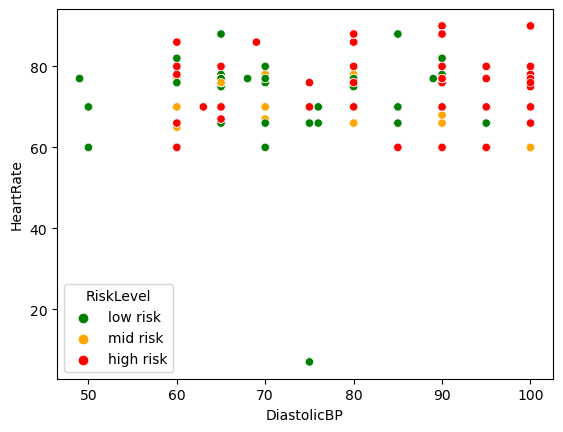

In [79]:
sns.scatterplot(data=dataset, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Again, HeartRate value seems has less effect on pregnant women's health risk compared to DiastolicBP.
#### 2.Looks like HeartRate variabel isn't really useful

### 6.13 BS and BodyTemp → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### Pregnant women with high blood glucose level seems to have a high health risk, regardless of their body temperature.

### 6.14 BS and HeartRate → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### Apparently, Pregnant women with higher blood glucose level seems to have a higher health risk, regardless of their heart rate.

### 6.15 BodyTemp and HeartRate → RiskLevel

In [ ]:
sns.scatterplot(data=data, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation:

#### 1.Pregnant women with higher body temperature seems to have a higher health risk, regardless of their heart rate (please note that according to previous analysis, pregnant women in this obervation mostly has 98 F body temperature).
#### 2.HeartRate variable really isn't helpful in this case.

### 7. Feature Engineering and Data Cleaning

### 7.1 Outlier Handling

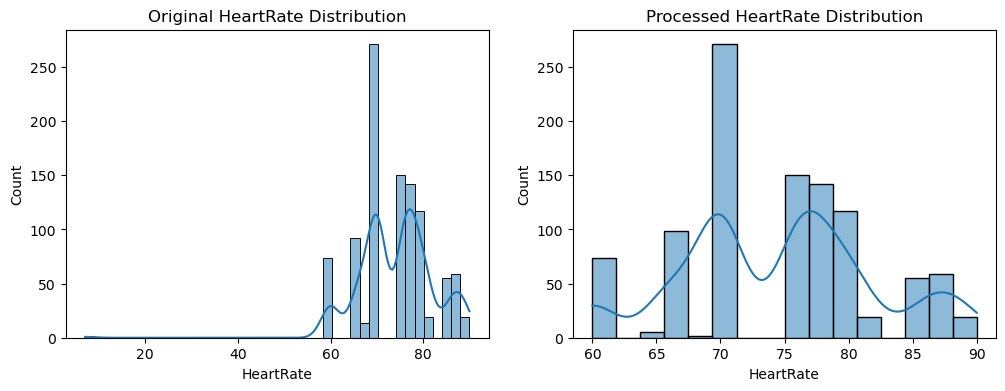

In [87]:
data_proc = dataset.drop(dataset.index[dataset.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=dataset, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

### 7.2 Removing Irrelevant Features

#### After conducting several analyzes of the predictor variables, we conclude that the HeartRate variable is less helpful in determining the health risks of pregnant women. So, it's safe to remove that variable.

In [88]:
data_proc = data_proc.drop(["HeartRate"], axis=1)

### 8. Spliting the data

In [89]:
# Original Dataset
X = dataset.drop("RiskLevel", axis=1)
y = dataset.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processes data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 811 train data and 203 test data

Processes data has 809 train data and 203 test data


## 9.Model Building

### 9.1 Building Classification Model

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### 9.2 Hyperparameter Tuning 

In [92]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy'],
            'max_depth' : [4,5,6,7,8,20,50]
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    },
        'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'param':{ 
            'n_estimators': [10,20,50,100,200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8,20,30,50],
            'criterion' :['gini', 'entropy']
        }
   
    },
        'LogisticRegression':{
        'model': LogisticRegression(),
        'param':{
            'C':np.logspace(-3,3,7), 
            'penalty':["l1","l2"]
        }
    },
        'BaggingClassifier':{
        'model': BaggingClassifier(),
        'param':{
            
            'n_estimators': [10,30,50,100,150,200],
            'random_state': [1,3,5,7,9,15,50,100]
        }
    },
        'AdaBoostClassifier':{
        'model': AdaBoostClassifier(),
        'param':{
            'n_estimators': [10,30,50,100,150,200],
            'random_state': [1,3,5,7,9,15,50,100]
        }
    }
}

In [95]:
# original Data

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    }) 

KeyboardInterrupt: 

In [96]:
pd.set_option('display.max_colwidth', -1)
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.813792,"{'criterion': 'gini', 'max_depth': 20}"
1,KNeighborsClassifier,0.675718,{'n_neighbors': 5}


In [97]:
## Naive bayes, original Data

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [98]:
y_pred=gnb.predict(x_train)
y_pred

array(['low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'high risk', 'mid risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'high risk', 'low risk', 'mid risk', 'mid risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'high risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'mid risk', 'high risk',
       'mid risk', 'low risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'mid risk', 'high risk',
       'low risk', 'low risk', 'mid risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'high risk', 'low risk',
       'mid risk', 'low risk', 'mid risk', 'low risk', 'high risk',
       'low risk', 'low risk', 'high risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'mid risk', 'low risk', 'high risk',
       'high risk', 'low risk', 'low risk', 'm

In [99]:
from sklearn import metrics

print("Gaussian Naive Bayes model accuracy(in %)",metrics.accuracy_score(y_train,y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) 61.28236744759556


In [100]:
# Processed Dataset

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x_train_proc,y_train_proc)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

KeyboardInterrupt: 

In [101]:
pd.set_option('display.max_colwidth', -1)
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.803474,"{'criterion': 'entropy', 'max_depth': 20}"
1,KNeighborsClassifier,0.678606,{'n_neighbors': 5}


### 9.3 Choosing the best model

In [102]:
model_proc_randomforest = RandomForestClassifier( criterion='entropy',max_depth=50,max_features='auto',n_estimators=20)

In [103]:
model_proc_randomforest.fit(x_train_proc, y_train_proc)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       n_estimators=20)

In [104]:
!pip install ibm_watson_machine_learning

In [105]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"zxEEdHfZzvI7MLaBo3G38CS7Pc6ySe56SK-Yc1cvVjDc"
}
client = APIClient(wml_credentials)

In [106]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [107]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID =" + space_uid)

Space UID =5f0d6a88-2d09-4566-9dde-6b8ed84c0871


In [108]:
client.set.default_space(space_uid)

'SUCCESS'

In [109]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----  ------------------  -------------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.1-py3.9
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.1-py3.9
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  supported
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base  unsupported         runtime-22.1-py3.9
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base  n

In [115]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")
software_spec_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [116]:
model_details = client.repository.store_model(model=model_proc_randomforest,meta_props={
    client.repository.ModelMetaNames.NAME:"Perinatal_health_risk_predictor_modeling",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.1",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id= client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [117]:
model_id

'a24bb48b-1dfe-4ae3-aaf4-da574a7b125a'

In [119]:
x_train.iloc[0]

Age            15.0 
SystolicBP     120.0
DiastolicBP    80.0 
BS             7.9  
BodyTemp       98.0 
HeartRate      70.0 
Name: 479, dtype: float64

In [133]:
model_proc_randomforest.predict(x_test_proc)

array(['low risk', 'mid risk', 'low risk', 'high risk', 'mid risk',
       'high risk', 'mid risk', 'low risk', 'high risk', 'low risk',
       'mid risk', 'mid risk', 'high risk', 'mid risk', 'high risk',
       'high risk', 'high risk', 'mid risk', 'mid risk', 'low risk',
       'high risk', 'mid risk', 'low risk', 'low risk', 'high risk',
       'high risk', 'high risk', 'high risk', 'mid risk', 'mid risk',
       'low risk', 'mid risk', 'mid risk', 'low risk', 'high risk',
       'low risk', 'low risk', 'mid risk', 'high risk', 'mid risk',
       'mid risk', 'low risk', 'mid risk', 'mid risk', 'mid risk',
       'mid risk', 'low risk', 'low risk', 'low risk', 'mid risk',
       'high risk', 'low risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'low risk', 'high risk', 'low risk', 'low risk',
       'low risk', 'mid risk', 'low risk', 'mid risk', 'high risk',
       'high risk', 'low risk', 'low risk', 'low risk', 'high risk',
       'low risk', 'mid risk', 'low risk', 

In [127]:
y_proc_predicted = model_proc_randomforest.predict(x_test_proc)

In [ ]:
result= model_proc_randomforest.score(x_test_proc,y_test_proc)*100
result

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
labels = np.unique(y_proc_predicted)
sns.heatmap(confusion_matrix(y_test_proc, y_proc_predicted), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
 
target_names = ['high risk', 'low risk', 'mid risk']
print(classification_report(y_test_proc, y_proc_predicted, target_names=target_names))

In [ ]:
p=[[float(35),float(120),float(60),float(6.1),float(98)]]

In [ ]:
Prediction=model_proc_randomforest.predict(p)
Prediction

In [ ]:
import pickle
pickle.dump(model_proc_randomforest,open("model_randomforest.pkl",'wb'))